# Boogiepop Wa Waranai

In [ ]:
#Sklearn

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.utils import resample,shuffle
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.metrics import make_scorer, precision_score, recall_score,f1_score, accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import make_scorer,precision_score,recall_score,accuracy_score,f1_score

#NLTK
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from IPython.display import display, HTML
#Other
import pandas as pd
import re
import string
import matplotlib.pyplot as pypl
import numpy as np
import seaborn as sd

In [ ]:
bog = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Post Upvotes\ Boogiepop Wa Waranai episodes posts votes .csv',index_col=0, encoding='utf-8-sig')

In [494]:
bdf1 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 1 .csv',index_col=0, encoding='utf-8-sig')
bdf2 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 2 .csv',index_col=0, encoding='utf-8-sig')
bdf3 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 3 .csv',index_col=0, encoding='utf-8-sig')
bdf4 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 4 .csv',index_col=0, encoding='utf-8-sig')
bdf5 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 5 .csv',index_col=0, encoding='utf-8-sig')
bdf6 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 6 .csv',index_col=0, encoding='utf-8-sig')
bdf7 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 7 .csv',index_col=0, encoding='utf-8-sig')
bdf8 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 8 .csv',index_col=0, encoding='utf-8-sig')
bdf9 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 9 .csv',index_col=0, encoding='utf-8-sig')
bdf10 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 10 .csv',index_col=0, encoding='utf-8-sig')
bdf11 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 11 .csv',index_col=0, encoding='utf-8-sig')
bdf12 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 12 .csv',index_col=0, encoding='utf-8-sig')
bdf13 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 13 .csv',index_col=0, encoding='utf-8-sig')
bdf14 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 14 .csv',index_col=0, encoding='utf-8-sig')
bdf15 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 15 .csv',index_col=0, encoding='utf-8-sig')
bdf16 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 16 .csv',index_col=0, encoding='utf-8-sig')
bdf17 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 17 .csv',index_col=0, encoding='utf-8-sig')
bdf18 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 18 .csv',index_col=0, encoding='utf-8-sig')

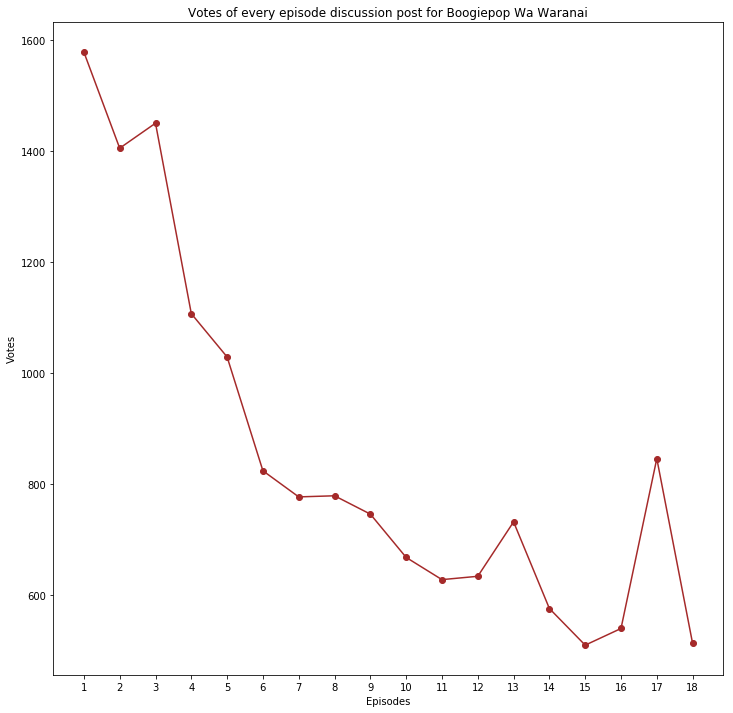

<Figure size 576x576 with 0 Axes>

In [495]:
pypl.figure(figsize=(12,12))
pypl.plot(np.arange(1,19),bog['Upvotes'],marker='o', color='brown')
pypl.xlabel('Episodes')
pypl.ylabel('Votes')
pypl.title('Votes of every episode discussion post for Boogiepop Wa Waranai')
pypl.xticks(np.arange(1,19))
pypl.figure(figsize=(8,8))
pypl.show()

In [496]:
boogie = [bdf1,bdf2,bdf3,bdf4,bdf5,bdf6,bdf7,bdf8,bdf9,bdf10,bdf11,bdf12,bdf13,bdf14,bdf15,bdf16,bdf17,bdf18]
#bog = [bdf15]

comment_count = []
n_count = []
p_count = []
ne_count = []

for index, dataset in enumerate(boogie):
    cata = dataset
    comment_count.append(cata.shape[0])
    cas = cata['Actual Polarity']
    ars = cas.value_counts()
    n_count.append(ars[0])
    p_count.append(ars[1])
    ne_count.append(ars[2])


Boogie_total_count = pd.DataFrame({'Episodes':bog['Episodes'],
                                   'Upvotes':bog['Upvotes'],
                                   'Total Comment Count':comment_count,
                                   'Number of Positive Comments': p_count,
                                   'Number of Negative Comments': n_count,
                                   'Number of Neutral Comments': ne_count})
ags = display(HTML(Boogie_total_count.to_html(index=False)))

Episodes,Upvotes,Total Comment Count,Number of Positive Comments,Number of Negative Comments,Number of Neutral Comments
Episode 1,1578,373,205,26,139
Episode 2,1405,467,205,53,208
Episode 3,1450,567,299,75,193
Episode 4,1107,279,164,10,105
Episode 5,1029,271,132,53,86
Episode 6,824,183,84,29,70
Episode 7,777,154,59,42,53
Episode 8,779,124,70,16,38
Episode 9,746,230,127,27,76
Episode 10,668,61,38,4,19


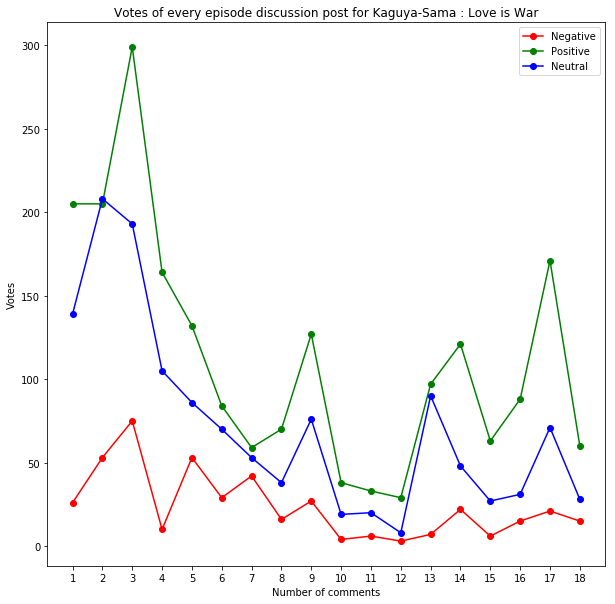

In [497]:
pypl.figure(figsize=(10,10))
pypl.plot(np.arange(1,19),n_count, color='r',marker='o',label='Negative')
pypl.plot(np.arange(1,19),p_count, color='g',marker='o',label='Positive')
pypl.plot(np.arange(1,19),ne_count, color='b',marker='o',label='Neutral')
pypl.xlabel('Number of comments')
pypl.ylabel('Votes')
pypl.title('Votes of every episode discussion post for Kaguya-Sama : Love is War')
pypl.legend()
pypl.xticks(np.arange(1,19))

pypl.show()

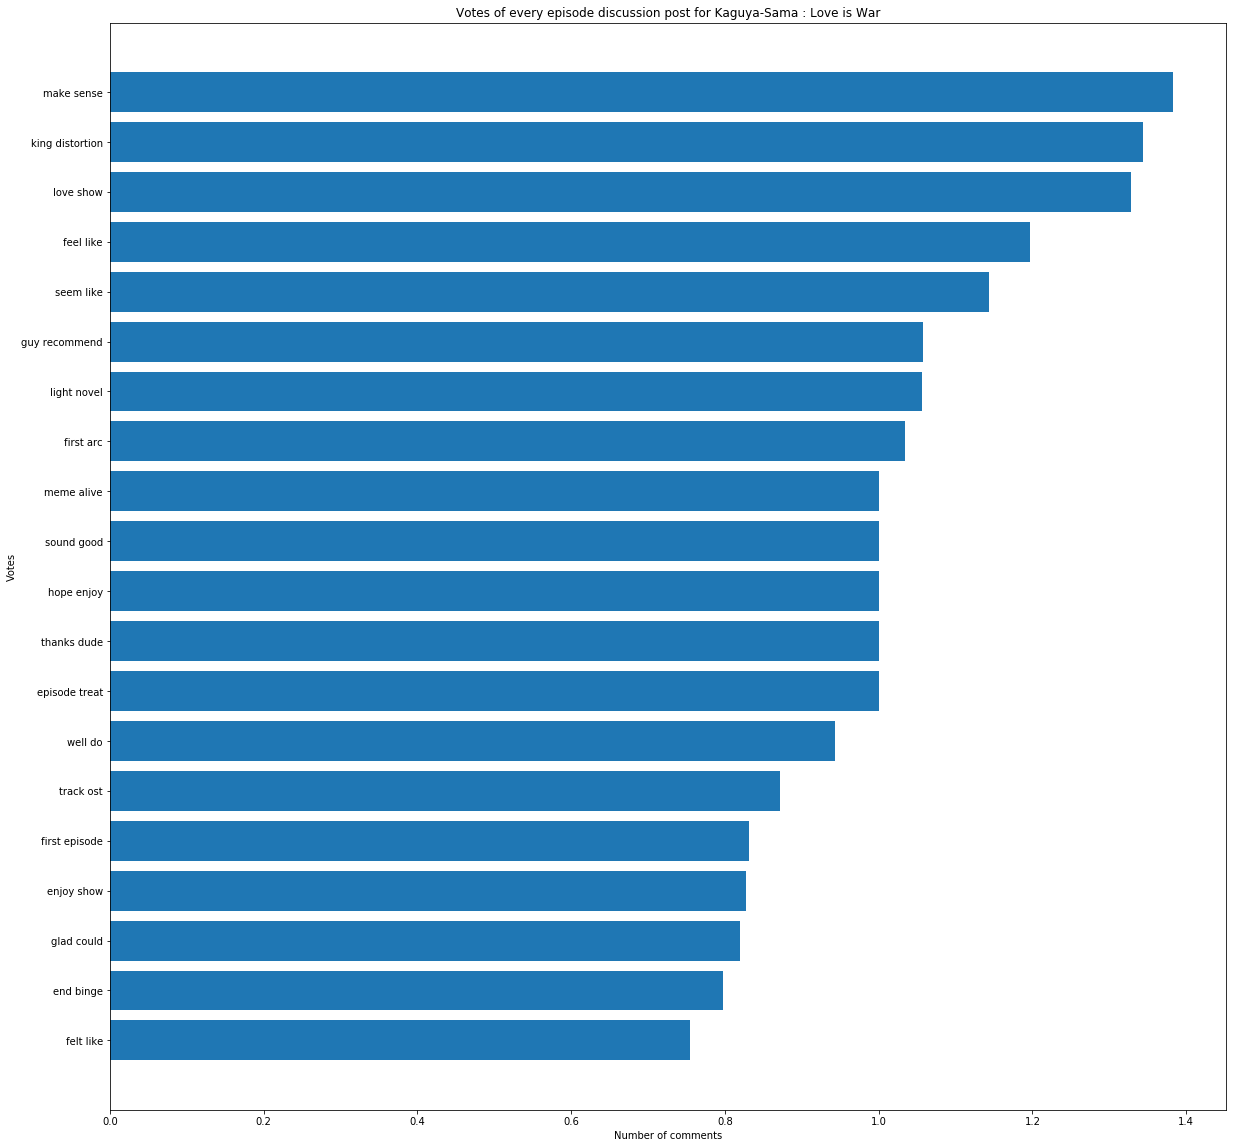

In [506]:
stopword = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def penntag(pen):
    morphy_tag = {'NN': 'n', 'JJ': 'a',
                  'VB': 'v', 'RB': 'r'}
    try:
        return morphy_tag[pen[:2]]
    except:
        return 'n'


def comment_cleaner(comm, comment_array):
    temp_comm = []
    megos = ' '
    uncontracted = ' '.join([contract[word] if word in contract else word for word in comm.lower().split()])
    stopwords_removed = [word for word in uncontracted.lower().split() if word not in stopword]
    POS_words = nltk.pos_tag(stopwords_removed)
    for i in range(0, len(POS_words)):
        lemmas = lemma.lemmatize(POS_words[i][0], pos=penntag(POS_words[i][1]))
        temp_comm.append(lemmas)
    # print(temp_comm)
    megos = ' '.join(word for word in temp_comm)
    #comment_array.append(megos)
    return megos
   # comment_array.clear()

tra = []
boog = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 17 .csv',index_col=0, encoding='utf-8-sig')

boog['Comments'] = boog['Comments'].astype(str)
boog['Comments'] = boog['Comments'].str.replace('[^\w\s]', ' ')
boog['Comments'] = boog['Comments'].str.replace('[\d+]', ' ')
boog['Comments'] = boog['Comments'].str.replace('(^| ).(( ).)*( |$)', ' ')
boog['Comments'] = boog['Comments'].apply(lambda s : comment_cleaner(s, tra))
a = boog[boog['Actual Polarity'] == 1]

#vec = CountVectorizer(ngram_range=(1, 2)).fit(a['Comments'])
vec = TfidfVectorizer(ngram_range=(2, 2))
bag_of_words = vec.fit_transform(a['Comments'])
sum_words = bag_of_words.sum(axis=0) 
agso = []
for word,index in vec.vocabulary_.items():
    agso.append((word,sum_words[0,index]))
wgso = sorted(agso,key=lambda x: x[1],reverse=True)
agsa = wgso[:20]
x = []
y = []
for i in range(0,len(agsa)):
    aus = agsa[i]
    x.append(aus[0])
    y.append(aus[1])
%matplotlib inline
pypl.figure(figsize=(20,20))
pypl.barh(x,y)
pypl.xlabel('Number of comments')
pypl.gca().invert_yaxis()
pypl.ylabel('Votes')
pypl.title('Votes of every episode discussion post for Kaguya-Sama : Love is War')
pypl.show()